# Stochastic Gradient Descent

SGD is an optimization algorithm used in Machine Learning to find the model parameters that corresponds to the best fit between actual and predicted values.


## Cost Function

The **cost function**, or _loss function_, is the function to be minimized (or maximized) by varying the decision variables.

The goal is to minimize the difference between the predicted and the actual data. The difference is called the **residual**.

## References

https://realpython.com/gradient-descent-algorithm-python/

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [169]:
import numpy as np


def gradient_descent(gradient, start, learn_rate, n_iter=50, tolerance=1e-6):
    history = []
    vector = start
    for _ in range(n_iter):
        history.append(vector)
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector, history

The function below implements $C=v^2$. The minimum should be at 0.

In [170]:
def C(v):
    """Implement C=v^2"""
    return np.square(v)

(2.210739197207331e-06, 4.887367798068914e-12)

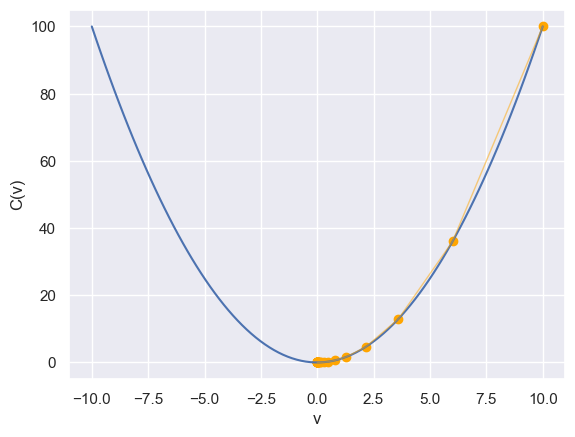

In [171]:
X = np.linspace(-10, 10, 100)

minimum, movements = gradient_descent(
    gradient=lambda v: 2 * v, start=10.0, learn_rate=0.2
)
plt.plot(X, C(X))
plt.scatter(movements, C(movements), color="orange")
plt.plot(movements, C(movements), color="orange", alpha=0.5, linewidth=1)
plt.xlabel("v")
plt.ylabel("C(v)")

minimum, C(minimum)

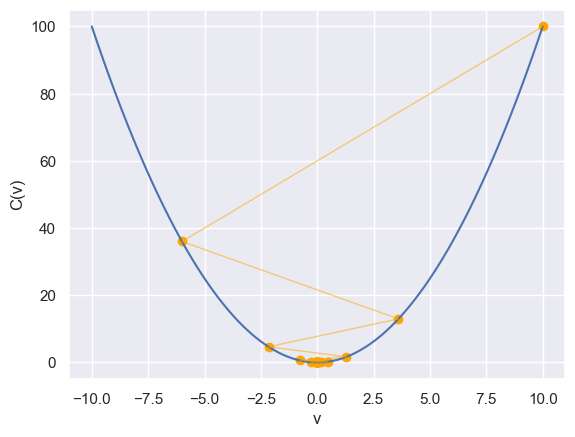

(-4.77519666596786e-07, 2.2802503198670566e-13)

In [172]:
minimum, movements = gradient_descent(
    gradient=lambda v: 2 * v, start=10.0, learn_rate=0.8
)
plt.plot(X, C(X))
plt.scatter(movements, C(movements), color="orange")
plt.plot(movements, C(movements), color="orange", alpha=0.5, linewidth=1)
plt.xlabel("v")
plt.ylabel("C(v)")
plt.show()


minimum, C(minimum)

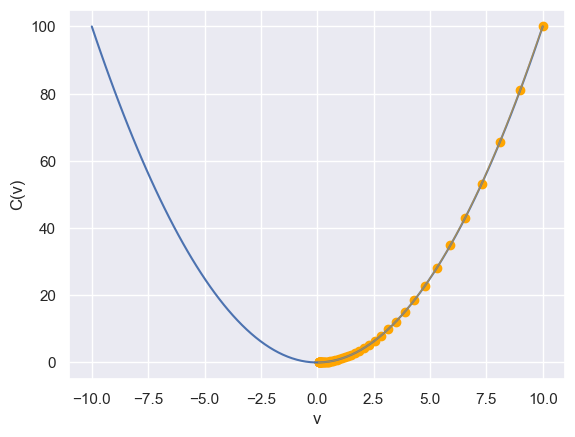

(0.051537752073201076, 0.002656139888758742)

In [173]:
minimum, movements = gradient_descent(
    gradient=lambda v: 2 * v, start=10.0, learn_rate=0.05
)
plt.plot(X, C(X))
plt.scatter(movements, C(movements), color="orange")
plt.plot(movements, C(movements), color="orange", alpha=0.5, linewidth=1)
plt.xlabel("v")
plt.ylabel("C(v)")
plt.show()


minimum, C(minimum)

## Nonconvex function

$C = v^4 - 5v^2 - 3v$

It has a global minimum in 𝑣 ≈ 1.7 and a local minimum in 𝑣 ≈ −1.42.

In [182]:
def C(v):
    v = np.array(v)
    return np.power(v, 4) - 5 * np.power(v, 2) - 3 * v


C(1.7), C(-1.42)

(-11.1979, -1.7561310400000014)

(-1.4207567437458342, -1.7559354013679256)

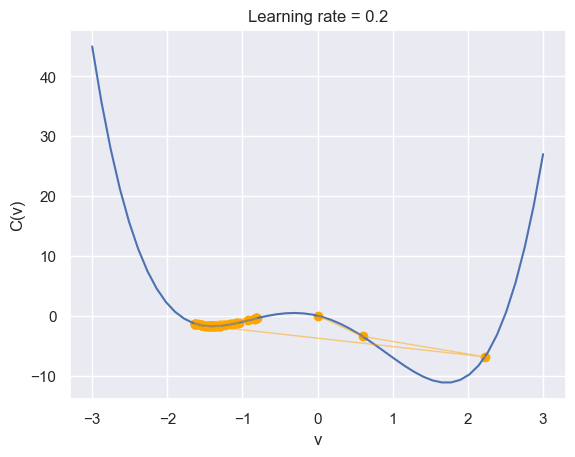

In [177]:
X = np.linspace(-3, 3, 50)


minimum, movements = gradient_descent(
    lambda v: 4 * v ** 3 - 10 * v - 3, start=0, learn_rate=0.2
)

plt.plot(X, C(X))
plt.scatter(movements, C(movements), color="orange")
plt.plot(movements, C(movements), color="orange", alpha=0.5, linewidth=1)
plt.xlabel("v")
plt.ylabel("C(v)")
plt.title("Learning rate = 0.2")

minimum, C(minimum)

(1.285401330315467, -9.387535084753722)

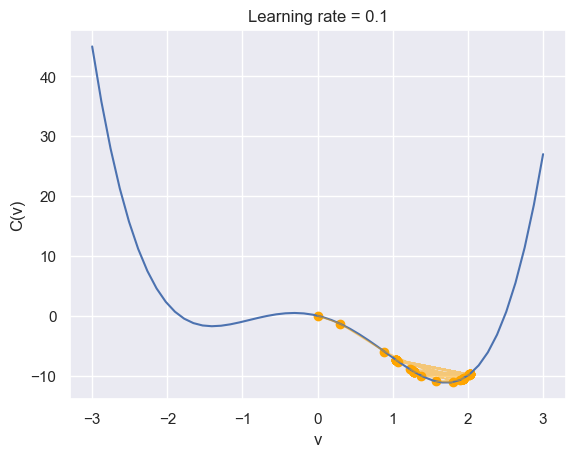

In [178]:
minimum, movements = gradient_descent(
    lambda v: 4 * v ** 3 - 10 * v - 3, start=0, learn_rate=0.1
)

plt.plot(X, C(X))
plt.scatter(movements, C(movements), color="orange")
plt.plot(movements, C(movements), color="orange", alpha=0.5, linewidth=1)
plt.xlabel("v")
plt.ylabel("C(v)")
plt.title("Learning rate = 0.1")

minimum, C(minimum)

In [179]:
import tensorflow as tf

In [188]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
var = tf.Variable(0.9)

loss = lambda: 4 * tf.pow(var, 3) - 10 * var - 3
for i in range(50):
    val0 = var.value()
    sgd.minimize(loss, var_list=[var])
    val1 = var.value()
    if i % 10 == 0:
        print("loss:", (val0 - val1).numpy())
var.numpy(), loss().numpy()

loss: -0.028000057
loss: -0.0020021796
loss: 0.009803176
loss: 0.00033771992
loss: -0.0034327507


(0.9120082, -9.085798)